In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [11]:
train = pd.read_excel('Data_Train.xlsx', )
test = pd.read_excel('Data_Test.xlsx')
sub = pd.read_excel('Sample_submission.xlsx')

In [12]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [13]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [14]:
a = np.log(train['COST'])

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [17]:
print(train['TITLE'].nunique())
print(train['RESTAURANT_ID'].nunique())
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

113
11892
4155
2689
359
1416
32
1847


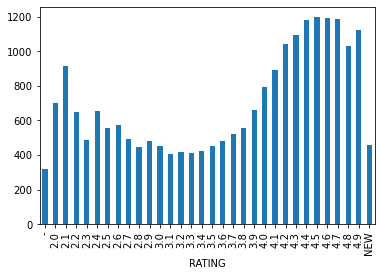

In [18]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

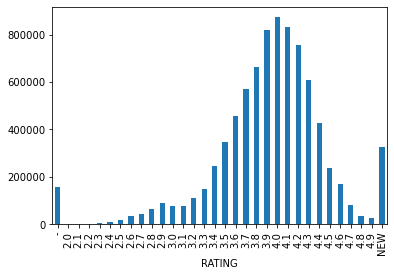

In [19]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [20]:
train['CITY'].value_counts()

Chennai                 2174
Bangalore               2149
Hyderabad               1819
Mumbai                  1722
New Delhi               1321
                        ... 
Andheri Lokhandwala.       1
1st Stage                  1
Chennai- 600107            1
Semmancheri                1
Kochi-16                   1
Name: CITY, Length: 359, dtype: int64

In [21]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [22]:
train[train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [23]:
train[train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [24]:
train['RATING'] = train['RATING'].astype('object')
# for test set
test['RATING'] = test['RATING'].astype('object') # replace the rating

In [25]:
train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [26]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [27]:
train['RATING'] = train['RATING'].astype(float) # replace the rating
# for test set
test['RATING'] = test['RATING'].astype(float) # replace the rating

checking the missing value

In [28]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [29]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

## joining the data

In [30]:
train['source']= 'train'
test['source'] = 'test'

In [31]:
data=pd.concat([train, test],ignore_index=True)

In [32]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [33]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True) 

In [34]:
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]

In [35]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165,votes


In [36]:
data['votes_no'] = data['votes_no'].astype(float)

## fillling missing value

In [37]:
data['votes_no'] = data['votes_no'].fillna(44.0) # filling with mode

In [38]:
data['RATING'] = data['RATING'].fillna(3.8) # filling with the median 

In [39]:
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')

In [40]:
data['CITY'] = data['CITY'].fillna('Chennai')

droping values

In [41]:
data = data.drop(['VOTES', 'votes'], axis=1)

## feature engineering

In [42]:
data['title_rat'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].mean())
data['title_rat_C'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].count())
data['city_rat'] = data['CITY'].map(data.groupby('CITY')['RATING'].mean())
data['city_rat_C'] = data['CITY'].map(data.groupby('CITY')['RATING'].count())
data['cuisine_rat'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].mean())
data['cuisine_rat_C'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].count())

In [43]:
data['rest_id'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['RATING'].count())
data['rest_id_votes'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['votes_no'].count())

In [44]:
data['title_rat_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['title_rat_C_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['city_rat_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['city_rat_C_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['cuisine_rat_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())
data['cuisine_rat_C_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())

In [45]:
data['rat_vote'] = data['RATING'] * data['votes_no']

## converison of data

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 25)


In [47]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,104,6346,5156,340,277,161,4.1,800.0,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [48]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [49]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

/home/aditya/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no,title_rat,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,49.0,3.651487,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,30.0,4.098920,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,221.0,3.651487,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,104,6346,5156,340,277,161,4.1,800.0,24.0,3.589670,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,165.0,3.717717,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [51]:
Test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,votes_no,title_rat,title_rat_C,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
12690,34,4085,3878,1417,323,1314,4.3,564.0,3.651487,4910,...,2,1,1,17928.8,17928.8,1115.9,1115.9,8.3,8.3,2425.2
12691,104,12680,4879,2548,277,429,4.2,61.0,3.589670,5634,...,1,1,1,20224.2,20224.2,9289.8,9289.8,4.2,4.2,256.2
12692,34,1411,4333,614,277,774,3.8,350.0,3.651487,4910,...,1,1,1,17928.8,17928.8,9289.8,9289.8,3.8,3.8,1330.0
12693,95,204,631,2955,128,846,3.8,1445.0,3.895726,1287,...,164,1,1,5013.8,5013.8,423.9,423.9,586.0,586.0,5491.0
12694,104,13453,4891,586,216,570,3.6,23.0,3.589670,5634,...,32,1,1,20224.2,20224.2,4194.4,4194.4,100.9,100.9,82.8


In [52]:
X = Train.drop('COST', axis=1)
y = a

In [53]:
from sklearn.linear_model import Ridge

In [54]:
r = Ridge()

In [55]:
r.fit(X, y)

Ridge()

In [56]:
pred = r.predict(X)

In [57]:
pred

array([6.53588047, 6.93296746, 6.4931246 , ..., 6.78748621, 6.4616864 ,
       6.37552013])

In [58]:
x_test = Test

In [59]:
test_pred = r.predict(x_test)

In [60]:
# Converting price back to original scale and making it integer
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [61]:
a =pd.DataFrame(Predict, columns=['COST'])

In [62]:
a

,COST
0,774
1,410
2,716
3,514
4,297
...,...
4226,718
4227,500
4228,362
4229,248


In [63]:
a.to_excel('cost1.xlsx')

## xgboost

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1994)

In [67]:
xg = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500)

In [68]:
xgs = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=200,random_state=1994)

In [69]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
preds = xg.predict(X_test)

In [71]:
xgs.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=1994,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
predss = xgs.predict(X)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, log_loss

In [74]:
print(np.sqrt(mean_squared_error(predss, y)))

0.23920668143025894


In [75]:
predss

array([6.744523 , 7.321703 , 6.4462337, ..., 7.2686195, 6.1649466,
       6.396817 ], dtype=float32)

In [76]:
test_predss = xgs.predict(Test)

In [77]:
# Converting price back to original scale and making it integer
Predicted=np.exp(test_predss)
Predicted=Predicted.astype(int)

In [78]:
abc =pd.DataFrame(Predicted, columns=['COST'])

In [79]:
abc

,COST
0,1243
1,361
2,667
3,265
4,271
...,...
4226,759
4227,577
4228,356
4229,279


In [80]:
abc.to_excel('cost90.xlsx')

In [81]:
preds

array([5.8979106, 6.442267 , 6.423628 , ..., 8.079107 , 5.910954 ,
       6.7890778], dtype=float32)

In [82]:
test_preds = xg.predict(x_test)

In [83]:
test_preds

array([7.0221353, 5.969846 , 6.468356 , ..., 5.680082 , 5.706837 ,
       5.772142 ], dtype=float32)

In [84]:
# Converting price back to original scale and making it integer
Predicts=np.exp(test_preds)
Predicts=Predicts.astype(int)

In [85]:
ab =pd.DataFrame(Predicts, columns=['COST'])

In [86]:
ab

,COST
0,1121
1,391
2,644
3,348
4,285
...,...
4226,660
4227,475
4228,292
4229,300


In [87]:
ab.to_excel('cost2.xlsx')